# Visualization Tools and Techniques

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Scatter

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

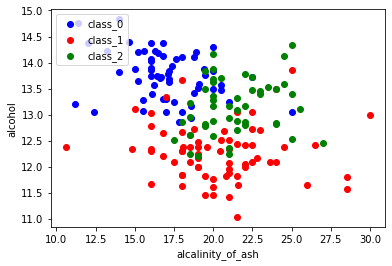

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    ax.scatter(wine.data[wine.target==label, x_index], 
                wine.data[wine.target==label, y_index],
                label=wine.target_names[label],
                c=color)

ax.set_xlabel(wine.feature_names[x_index])
ax.set_ylabel(wine.feature_names[y_index])
ax.legend(loc='upper left')
plt.show()


## Pair plots

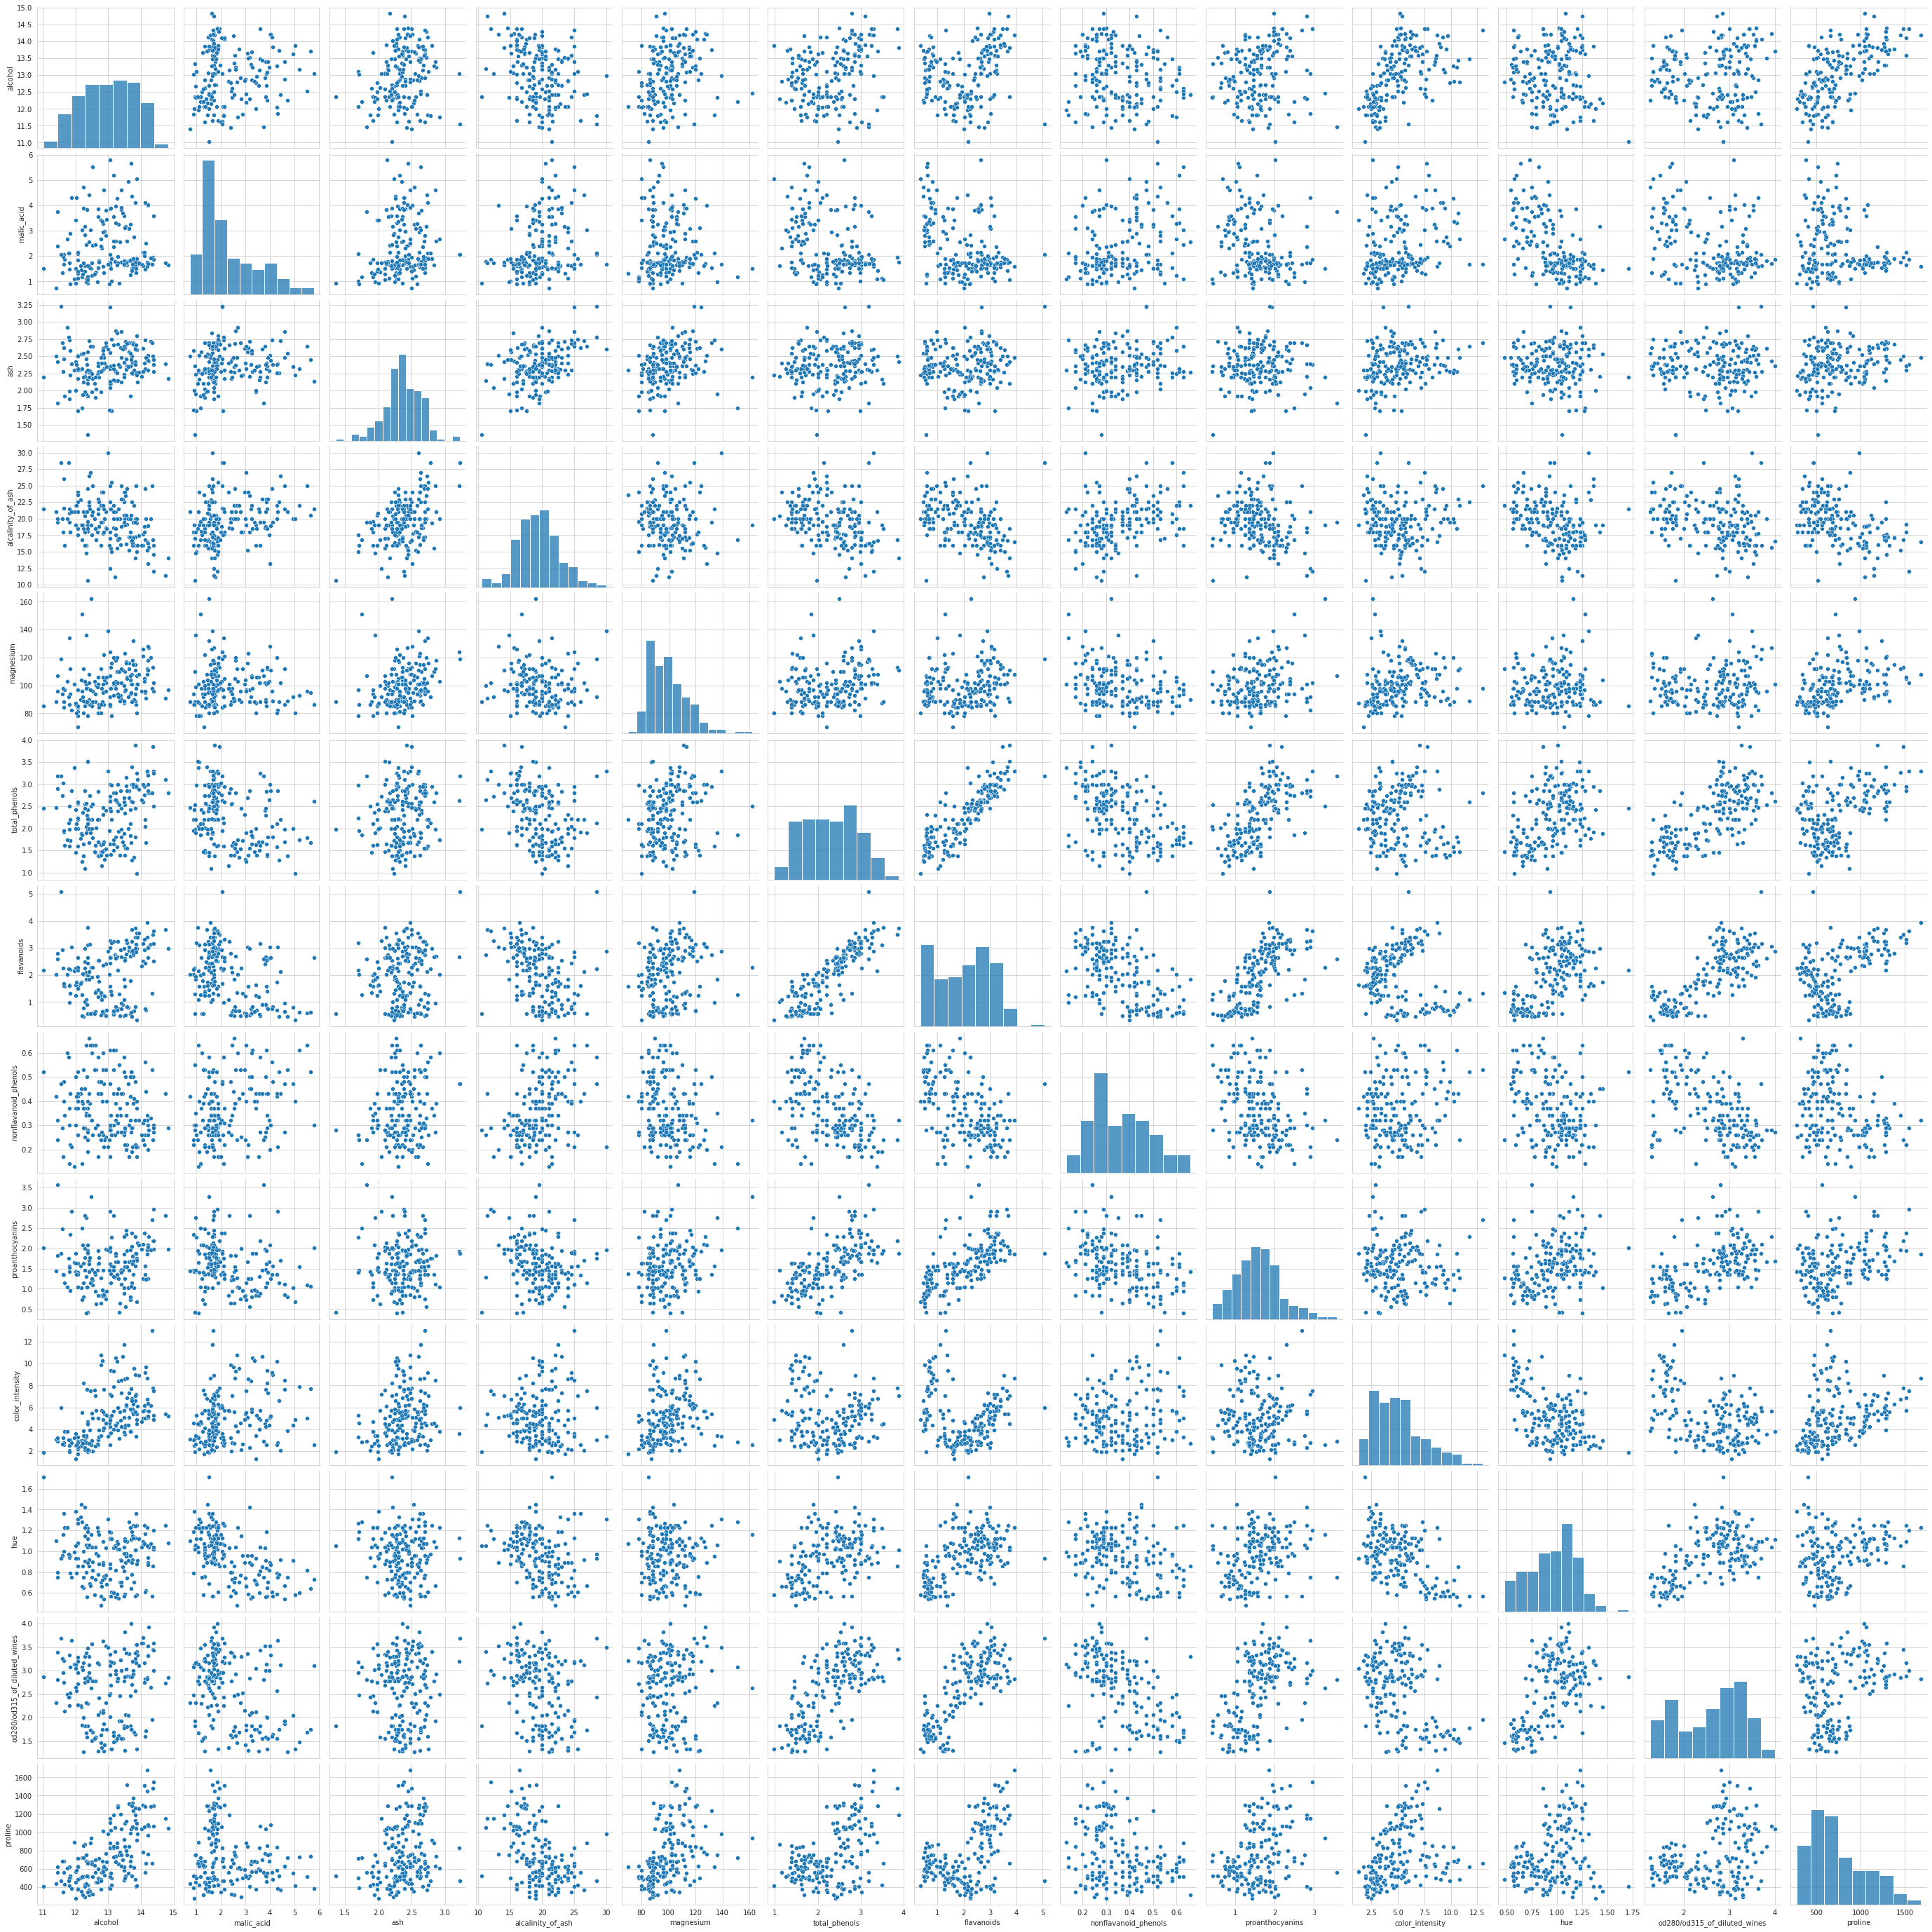

In [16]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
sns.set_style("whitegrid")
sns.pairplot(wine_df, height=3)
plt.show()


## Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


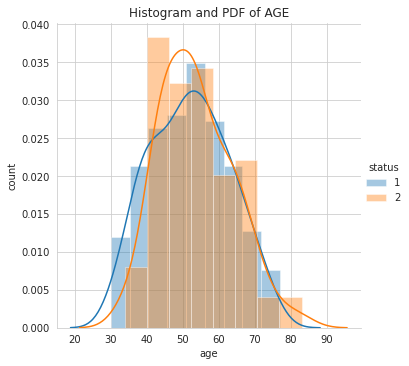

In [22]:
from matplotlib import pyplot as plt
hb = pd.read_csv("haberman.csv", 
                  header = None, 
                  names=['age', 'year', 'nodes', 'status'])
sns.FacetGrid(hb, hue="status", height=5) .map(sns.distplot, "age").add_legend();
plt.title('Histogram and PDF of AGE')
plt.ylabel('count')
plt.show()

## Bar chart

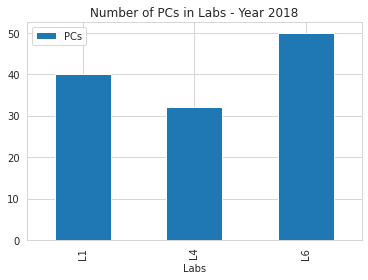

In [24]:
import matplotlib.pyplot as plot

data = {"Labs":["L1", "L4", "L6"],
        "PCs":[40,32,50]};      

dataFrame = pd.DataFrame(data=data)

dataFrame.plot.bar(x="Labs", y="PCs", title="Number of PCs in Labs - Year 2018")

plot.show(block=True)


## Line plot

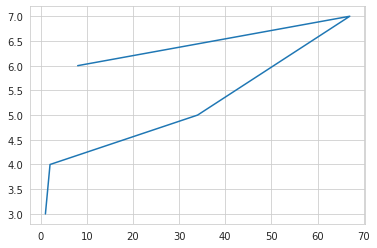

In [30]:
plt.plot([1,2,34,67,8], [3,4,5,7,6])
plt.show()

# Visualization of Trained Models

## Graphwiz

Decision Tree Classification Model

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 6

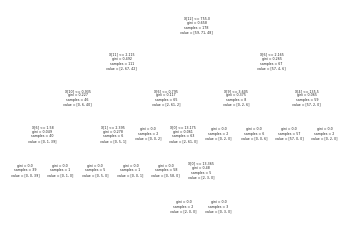

In [32]:
from sklearn import tree
wine = load_wine()
X, y = wine.data, wine.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y) 
tree.plot_tree(clf) 


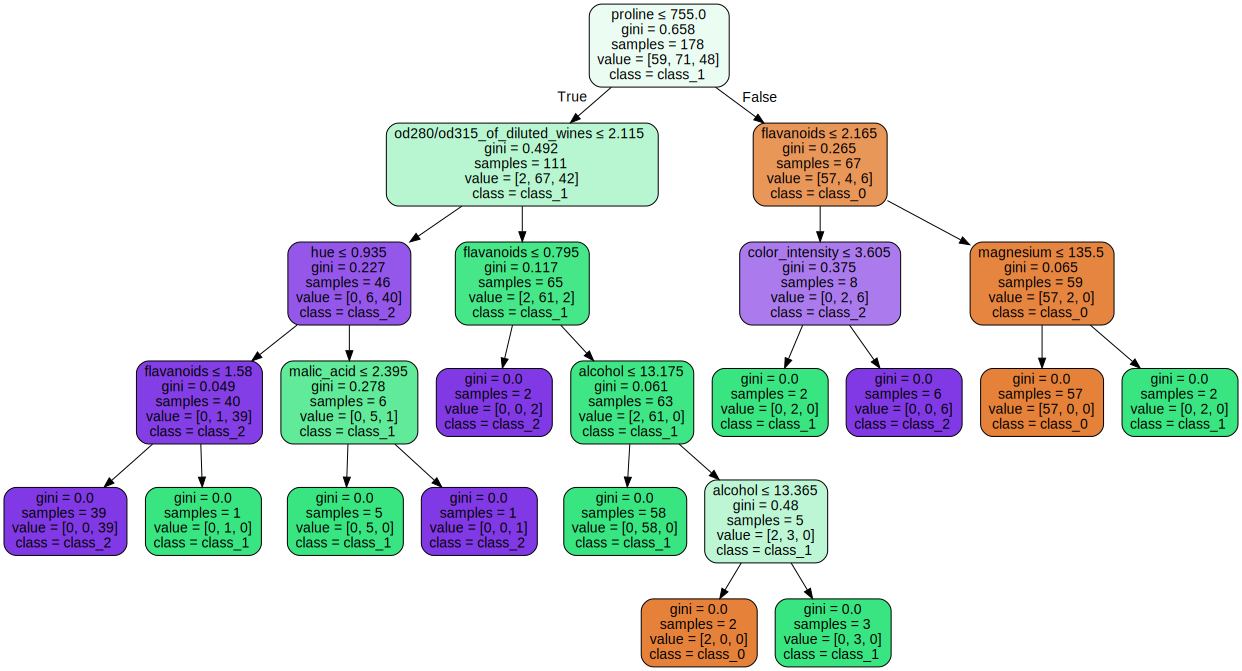

In [33]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=wine.feature_names,  
                     class_names=wine.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Dendogram

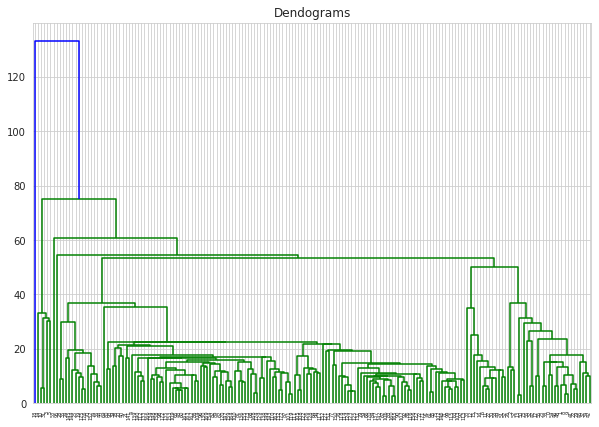

In [38]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(wine_df))

## Visualize Deep Neural Network Model

In [42]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [43]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 14s 1ms/step - loss: 9.8662 - accuracy: 0.6114
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 3.6530 - accuracy: 0.5599
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 1.9047 - accuracy: 0.5043
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1427 - accuracy: 0.5763
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9598 - accuracy: 0.5948
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8753 - accuracy: 0.6165
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8527 - accuracy: 0.5602
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7703 - accuracy: 0.6095
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.6029
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7334 - accuracy: 0.6296
Epoch 11

In [48]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
'Accuracy: %.2f' % (accuracy*100)

24/24 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.7422


'Accuracy: 74.22'

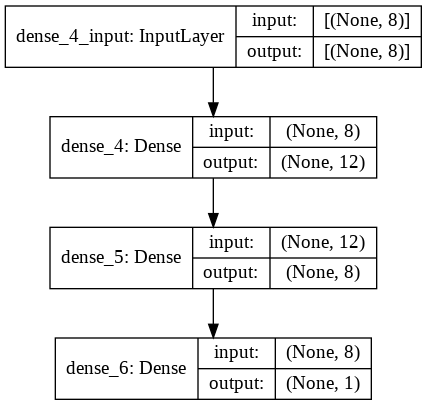

In [50]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Confusion Matrix

Sir Code

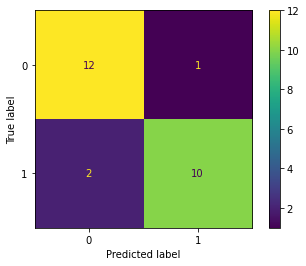

In [13]:
#Sir code
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

My model and code

In [7]:
# Importing the dataset.
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)



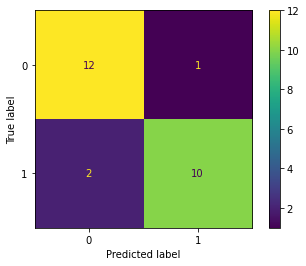

In [16]:
# Creating independent and dependent variables.
X, y = mnist['data'], mnist['target']
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [8]:

# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = X[:6000], X[60000:66000], y[:6000], y[60000:66000]

"""
The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar.
"""

# Training a binary classifier.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

"""
Building a dumb classifier that just classifies every single image in the “not-5” class.
"""

from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
	def fit(self, X, y=None):
		pass
	def predict(self, X):
		return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([1., 1., 1.])

In [9]:

# Creating some predictions.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)

"""
You could make predictions on the test set, but use the test set only at the very end of your project, once you have a classifier that you are ready to launch.
"""

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[6000]])

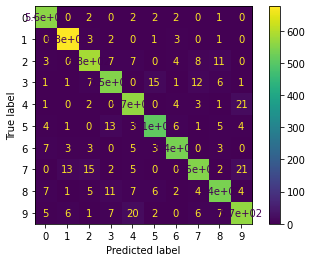

In [11]:

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)